In [ ]:
## Hopfield Network applied to simple letters



In [3]:
from numpy import array
from pylab import imshow, cm, show
from numpy import zeros, outer, diag_indices 
from numpy import vectorize, dot

## Training data

In [4]:
    
A = """
.XXX.
X...X
XXXXX
X...X
X...X
"""

T = """
XXXXX
..X..
..X..
..X..
..X..
"""
 
Z = """
XXXXX
...X.
..X..
.X...
XXXXX
"""

In [18]:
def to_pattern(letter):
    return array([+1 if c=='X' else -1 for c in letter.replace('\n','')])

def display(pattern):
    imshow(pattern.reshape((5,5)),cmap=cm.binary, interpolation='nearest')
    show()

def train(patterns):
    r,c = patterns.shape
    print("r: {}, c: {}".format(r,c))
    
    W = zeros((c,c))
    for p in patterns:
        W = W + outer(p,p)
    W[diag_indices(c)] = 0
    return W/r


def recall(W, patterns, steps=5):
    sgn = vectorize(lambda x: -1 if x<0 else +1)  #convert x to 1. 
    
    for _ in range(steps):        
        patterns = sgn(dot(patterns,W))
    return patterns
    
def hopfield_energy(W, patterns):
    return array([-0.5*dot(dot(p.T,W),p) for p in patterns])
        
    
#print(to_pattern(A))

#display(to_pattern(A))

patterns = array([to_pattern(A), to_pattern(T), to_pattern(Z)])
Weights = train(patterns)
print(Weights)


print(array([to_pattern(T)]))

r: 3, c: 25
[[ 0.          0.33333333  0.33333333  0.33333333  1.         -1.
  -0.33333333  0.33333333  0.33333333 -1.         -1.         -1.
   0.33333333 -1.         -1.         -1.          0.33333333 -0.33333333
  -0.33333333 -1.         -0.33333333  0.33333333  0.33333333  0.33333333
  -0.33333333]
 [ 0.33333333  0.          1.          1.          0.33333333 -0.33333333
  -1.         -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
   1.         -0.33333333 -0.33333333 -0.33333333 -0.33333333 -1.
  -1.         -0.33333333  0.33333333 -0.33333333 -0.33333333 -0.33333333
   0.33333333]
 [ 0.33333333  1.          0.          1.          0.33333333 -0.33333333
  -1.         -0.33333333 -0.33333333 -0.33333333 -0.33333333 -0.33333333
   1.         -0.33333333 -0.33333333 -0.33333333 -0.33333333 -1.
  -1.         -0.33333333  0.33333333 -0.33333333 -0.33333333 -0.33333333
   0.33333333]
 [ 0.33333333  1.          1.          0.          0.33333333 -0.33333333
  -1.        

# Test with partial input

In [17]:
T = """
XXXXX
..X..
..X..
.....
.....
"""

test = array([to_pattern(T)])
print(test)
#test[:3] = -1
output=recall(Weights,test,5)

print(output)


h = hopfield_energy(Weights, output)
print(h)

[[ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1]]
[[ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1]]
[[ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1]]
[-101.33333333]


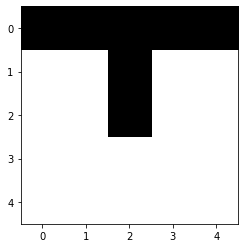

In [16]:
display(output)

In [ ]:
##each pixel = one node

##for mnist data, there are ten patterns

from mnist import MNIST
mndata = MNIST('./')
images, labels = mndata.load_training()


#import mnist
#import scipy.misc

#images = mnist.train_images()

In [37]:
print(28*28)

784


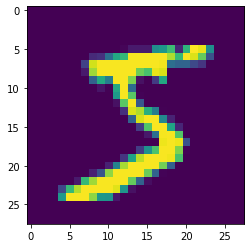

In [40]:
plt.imshow(np.reshape(images[0],[28,28]))

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')


N = 784  ##number of units
P = 10 ##number of patterns to be stored
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 40
NO_OF_BITS_TO_CHANGE = 200

##assign random states of {-1,+1} for each of the PxN units
epsilon = np.asarray([np.random.choice([1, -1], size=N*10)])

In [48]:
epsilon = np.reshape(epsilon, [P,N])
print(np.shape(epsilon))

(10, 784)


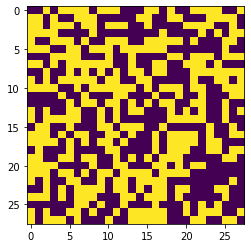

In [51]:
random_pattern = np.random.randint(P)
test_array = epsilon[random_pattern]

plt.imshow(np.reshape(epsilon[0,:], [28,28]))
plt.show()

In [52]:
#random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
#test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

##train the network

w = np.zeros((N, N))
h = np.zeros(N)

#use tqdm (part of pypi) to get a progress meter
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N

100%|██████████| 784/784 [00:33<00:00, 23.13it/s]


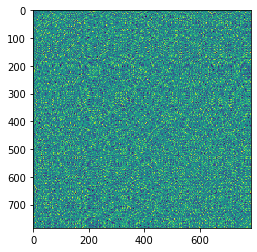

In [53]:
plt.imshow(w)

92


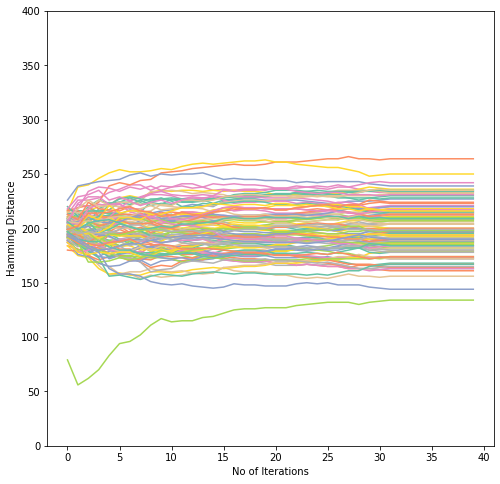

In [27]:
hamming_distance = np.zeros((NO_OF_ITERATIONS, P))
for iteration in range(NO_OF_ITERATIONS):
    for _ in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)

    for i in range(P):
        hamming_distance[iteration, i] = ((epsilon - test_array)[i]!=0).sum()

fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, N])
plt.show()

In [56]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm

class HopfieldNetwork(object):      
    def train_weights(self, train_data):
        print("Start to train weights...")
        num_data =  len(train_data)
        self.num_neuron = train_data[0].shape[0]
        
        # initialize weights
        W = np.zeros((self.num_neuron, self.num_neuron))
        rho = np.sum([np.sum(t) for t in train_data]) / (num_data*self.num_neuron)
        
        # Hebb rule
        for i in tqdm(range(num_data)):
            t = train_data[i] - rho
            W += np.outer(t, t)
        
        # Make diagonal element of W into 0
        diagW = np.diag(np.diag(W))
        W = W - diagW
        W /= num_data
        
        self.W = W 
    
    def predict(self, data, num_iter=20, threshold=0, asyn=False):
        print("Start to predict...")
        self.num_iter = num_iter
        self.threshold = threshold
        self.asyn = asyn
        
        # Copy to avoid call by reference 
        copied_data = np.copy(data)
        
        # Define predict list
        predicted = []
        for i in tqdm(range(len(data))):
            predicted.append(self._run(copied_data[i]))
        return predicted
    
    def _run(self, init_s):
        if self.asyn==False:
            """
            Synchronous update
            """
            # Compute initial state energy
            s = init_s

            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                # Update s
                s = np.sign(self.W @ s - self.threshold)
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
        else:
            """
            Asynchronous update
            """
            # Compute initial state energy
            s = init_s
            e = self.energy(s)
            
            # Iteration
            for i in range(self.num_iter):
                for j in range(100):
                    # Select random neuron
                    idx = np.random.randint(0, self.num_neuron) 
                    # Update s
                    s[idx] = np.sign(self.W[idx].T @ s - self.threshold)
                
                # Compute new state energy
                e_new = self.energy(s)
                
                # s is converged
                if e == e_new:
                    return s
                # Update energy
                e = e_new
            return s
    
    
    def energy(self, s):
        return -0.5 * s @ self.W @ s + np.sum(s * self.threshold)

    def plot_weights(self):
        plt.figure(figsize=(6, 5))
        w_mat = plt.imshow(self.W, cmap=cm.coolwarm)
        plt.colorbar(w_mat)
        plt.title("Network Weights")
        plt.tight_layout()
        plt.savefig("weights.png")
        plt.show()

In [ ]:
from mnist import MNIST
mndata = MNIST('./')

import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_mean

# Utils
def reshape(data):
    dim = int(np.sqrt(len(data)))
    data = np.reshape(data, (dim, dim))
    return data

def plot(data, test, predicted, figsize=(3, 3)):
    data = [reshape(d) for d in data]
    test = [reshape(d) for d in test]
    predicted = [reshape(d) for d in predicted]
    
    fig, axarr = plt.subplots(len(data), 3, figsize=figsize)
    for i in range(len(data)):
        if i==0:
            axarr[i, 0].set_title('Train data')
            axarr[i, 1].set_title("Input data")
            axarr[i, 2].set_title('Output data')
            
        axarr[i, 0].imshow(data[i])
        axarr[i, 0].axis('off')
        axarr[i, 1].imshow(test[i])
        axarr[i, 1].axis('off')
        axarr[i, 2].imshow(predicted[i])
        axarr[i, 2].axis('off')
            
    plt.tight_layout()
    plt.savefig("result_mnist.png")
    plt.show()

def preprocessing(img):
    #w = np.shape(img)[0]
    #h = np.shape(img)[1]
    #w = 28
    #h = 28
    print(np.shape(img))
    # Thresholding
    thresh = threshold_mean(img)
    binary = img > thresh
    shift = 2*(binary*1)-1 # Boolian to int
    
    # Reshape
    #flatten = np.reshape(shift, (w*h))
    print(np.shape(shift))
    return shift

In [ ]:
# Load data
x_train, y_train = mndata.load_training()
print(np.shape(x_train))
    #(x_train, y_train), (_, _ )= mnist.load_data()
    

In [ ]:
print(np.shape(y_train))
print(np.shape(x_train[y_train==0]))

In [93]:
result = np.where(np.array(y_train) == 1)
print(result) 

(array([    3,     6,     8, ..., 59979, 59984, 59994]),)


In [126]:
training_exemplars = []

for i in range(10):
  result = np.where(np.array(y_train) == i)
  training_exemplars.append(result[0])

print(training_exemplars)

[array([    1,    21,    34, ..., 59952, 59972, 59987]), array([    3,     6,     8, ..., 59979, 59984, 59994]), array([    5,    16,    25, ..., 59983, 59985, 59991]), array([    7,    10,    12, ..., 59978, 59980, 59996]), array([    2,     9,    20, ..., 59943, 59951, 59975]), array([    0,    11,    35, ..., 59968, 59993, 59997]), array([   13,    18,    32, ..., 59982, 59986, 59998]), array([   15,    29,    38, ..., 59963, 59977, 59988]), array([   17,    31,    41, ..., 59989, 59995, 59999]), array([    4,    19,    22, ..., 59973, 59990, 59992])]


In [143]:
data = []
for i in range(10):
  img = np.reshape(x_train[training_exemplars[i][0]],[28,28])
  thresh = threshold_mean(img)
  binary = img > thresh
   # print(np.max(binary))
  shift = np.reshape(2*(binary*1)-1, [784])   # Boolian to int 
  data.append(shift)
    
   # print(np.max(shift))
   # plt.imshow(shift)
   # plt.show()

In [144]:
print(np.shape(training_exemplars))
print(y_train[:15])

(10,)
array('B', [5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1])


In [145]:
model = HopfieldNetwork()
model.train_weights(data)

100%|██████████| 10/10 [00:00<00:00, 179.79it/s]

Start to train weights...


In [146]:
print(np.shape(data))

(10, 784)


In [147]:
predicted = model.predict(data, threshold=150, asyn=True)

 20%|██        | 2/10 [00:00<00:00, 12.05it/s]

Start to predict...


100%|██████████| 10/10 [00:00<00:00, 19.36it/s]


In [148]:
print(np.shape(predicted))

(10, 784)


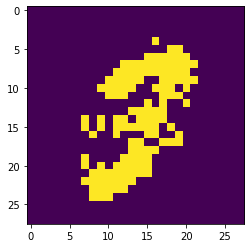

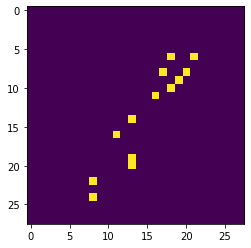

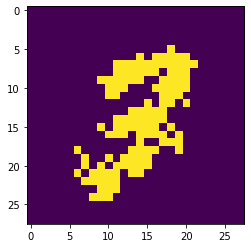

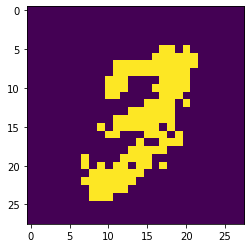

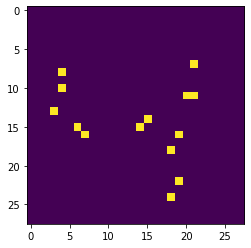

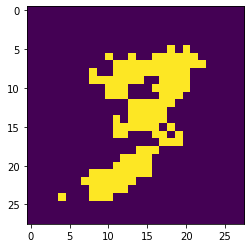

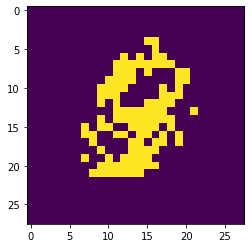

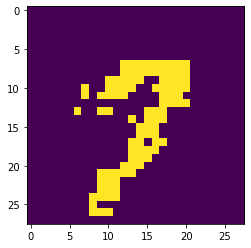

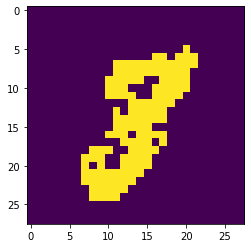

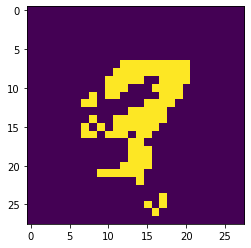

In [149]:
#print(predicted)
for i in range(10):
  plt.imshow(np.reshape(predicted[i], [28,28]))
  plt.show()

In [106]:
#    print(np.shape(d))
        
'''    
data = [preprocessing(d) for d in data]
    
    # Create Hopfield Network Model
model = HopfieldNetwork()
model.train_weights(data)
    
    # Make test datalist
    test = []
    for i in range(3):
        xi = x_train[y_train==i]
        test.append(xi[1])
    test = [preprocessing(d) for d in test]
    
    predicted = model.predict(test, threshold=50, asyn=True)
    print("Show prediction results...")
    plot(data, test, predicted, figsize=(5, 5))
    print("Show network weights matrix...")
    model.plot_weights()
'''

  0%|          | 0/10 [00:00<?, ?it/s]

Start to train weights...


ValueError: operands could not be broadcast together with shapes (28,28) (784,784) (28,28) 